# Monetización en Youtube con Machine Learning

#### Xiomy Diaz Morales - TFM Máster Universitario en Análisis y Visualización de Datos

Modelos de Machine Learning

In [1]:
# Importar las bibliotecas principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")


In [2]:
# Cargar el dataset
file_path = '../data/dataset.csv'  
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
df.head()

,ID,Date,Video Type,tag_map,partido_map,cat_match,content_type_map,Impressions,Likes,Comments,Shares,Video Views,Interactions,Avg_percentage_viewed,Watch_time_hours,Ingresos
0,****yZ_2XGk,7/20/2024,Short,Ninguno,Ninguno,Ninguno,Content_G,43346,269,18,7,6570,294,88.6500,42.0660,1.448
1,****kF_3svQ,7/18/2024,Short,tag_A,partido177,Otros,Content_J,106980,396,6,11,19541,413,86.6500,117.5791,4.330
2,****8d_7-Mk,6/17/2024,Video,tag_B,partido141,Otros,Content_N,54898,27,0,2,3777,29,0.5355,64.6095,0.000
3,****YZ_8JJA,6/20/2024,Short,tag_B,partido160,Otros,Content_J,29127,97,5,3,5457,105,0.4866,39.8284,0.000
4,****ge_an0Q,6/16/2024,Short,tag_B,partido152,Otros,Content_J,13583,61,0,2,1865,63,0.3725,11.3861,0.000


In [3]:
# Información general sobre el dataset
df.info()

# Resumen estadístico de las columnas numéricas
df.describe()

# Verificar si hay valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1800 non-null   object 
 1   Date                   1800 non-null   object 
 2   Video Type             1800 non-null   object 
 3   tag_map                1800 non-null   object 
 4   partido_map            1800 non-null   object 
 5   cat_match              1800 non-null   object 
 6   content_type_map       1800 non-null   object 
 7   Impressions            1800 non-null   int64  
 8   Likes                  1800 non-null   int64  
 9   Comments               1800 non-null   int64  
 10  Shares                 1800 non-null   int64  
 11  Video Views            1800 non-null   int64  
 12  Interactions           1800 non-null   int64  
 13  Avg_percentage_viewed  1800 non-null   float64
 14  Watch_time_hours       1800 non-null   float64
 15  Ingr

ID                       0
Date                     0
Video Type               0
tag_map                  0
partido_map              0
cat_match                0
content_type_map         0
Impressions              0
Likes                    0
Comments                 0
Shares                   0
Video Views              0
Interactions             0
Avg_percentage_viewed    0
Watch_time_hours         0
Ingresos                 0
dtype: int64

In [4]:
# Listar las columnas categóricas
categorical_cols = ['Video Type', 'tag_map',  'cat_match', 'content_type_map']

# Ver los valores únicos de cada columna categórica
for col in categorical_cols:
    print(f"Valores únicos en {col}: {df[col].unique()}")



Valores únicos en Video Type: ['Short' 'Video']
Valores únicos en tag_map: ['Ninguno' 'tag_A' 'tag_B' 'tag_C' 'tag_D' 'tag_E' 'tag_J' 'tag_H' 'tag_G'
 'tag_I' 'tag_F']
Valores únicos en cat_match: ['Ninguno' 'Otros' 'Semifinal' 'Final' 'Cuartos']
Valores únicos en content_type_map: ['Content_G' 'Content_J' 'Content_N' 'Content_B' 'Content_S' 'Content_F'
 'Content_V' 'Content_K' 'Content_W' 'Content_O' 'Content_Q' 'Content_I'
 'Content_E' 'Content_L' 'Content_R' 'Content_D' 'Content_P' 'Content_U'
 'Content_M' 'Content_C' 'Content_H' 'Content_A' 'Content_T']


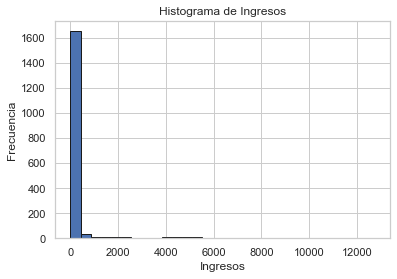

In [5]:
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame y 'revenue' es la columna que quieres analizar.
plt.hist(df['Ingresos'], bins=30, edgecolor='k')
plt.title('Histograma de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()


## Modelos Predictivos

Preparación de datos

In [6]:
# Eliminar columnas no deseadas
columns_to_remove = ['ID', 'partido_map', 'Date']
df = df.drop(columns=columns_to_remove)

In [7]:
# Aplicar One-Hot Encoding con prefijo opcional
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

# Verificar si el proceso fue exitoso
if df_encoded.shape[1] > df.shape[1]:
    print("El One-Hot Encoding se ha aplicado correctamente. Se han creado nuevas columnas.")
else:
    print("¡Error! El One-Hot Encoding no se ha aplicado correctamente. Verifica los nombres de las columnas y el proceso.")

# Mostrar las primeras 5 filas de algunas de las columnas codificadas
print(df_encoded.head())

# Verificar si hay valores faltantes
print(df_encoded.isnull().sum().sum())  # Imprime la cantidad total de valores faltantes

El One-Hot Encoding se ha aplicado correctamente. Se han creado nuevas columnas.
   Impressions  Likes  Comments  Shares  Video Views  Interactions  \
0        43346    269        18       7         6570           294   
1       106980    396         6      11        19541           413   
2        54898     27         0       2         3777            29   
3        29127     97         5       3         5457           105   
4        13583     61         0       2         1865            63   

   Avg_percentage_viewed  Watch_time_hours  Ingresos  Video Type_Short  ...  \
0                88.6500           42.0660     1.448                 1  ...   
1                86.6500          117.5791     4.330                 1  ...   
2                 0.5355           64.6095     0.000                 0  ...   
3                 0.4866           39.8284     0.000                 1  ...   
4                 0.3725           11.3861     0.000                 1  ...   

   content_type_map_Con

Para abordar una distribución con asimetría positiva, la transformación logarítmica es una opción efectiva porque puede ayudar a reducir el sesgo al hacer que los datos se distribuyan de manera más cercana a una distribución normal.

### Transformación Logarítmica Simple

In [8]:
import numpy as np
import pandas as pd

# Supongamos que 'df' es tu DataFrame y 'revenue' es la columna que quieres transformar.
df['Ingresos_log'] = np.log1p(df['Ingresos'])  # np.log1p(x) es equivalente a np.log(1 + x)


np.log1p(x) es preferible a np.log(x) cuando tus datos contienen valores cercanos a cero porque evita problemas con el logaritmo de cero y valores negativos.

### Transformación de Raíz Cuadrada

In [9]:
df['Ingresos_sqrt'] = np.sqrt(df['Ingresos'])

La raíz cuadrada puede ser una alternativa si la transformación logarítmica no es suficiente.

### Transformación de Raíz Cúbica

In [10]:
df['Ingresos_cbrt'] = np.cbrt(df['Ingresos'])

La raíz cúbica puede ser útil si tienes valores extremadamente grandes y necesitas una transformación más moderada.

In [11]:
# Separar las variables predictoras y la variable objetivo
X = df_encoded.drop(['Ingresos'], axis=1)  # Variables predictoras
y = df_encoded['Ingresos']  # Variable objetivo

### Comparación de Transformaciones
Después de aplicar estas transformaciones, es útil comparar cómo se distribuyen los datos transformados para seleccionar la mejor opción. Aquí te dejo un código para comparar visualmente las transformaciones:

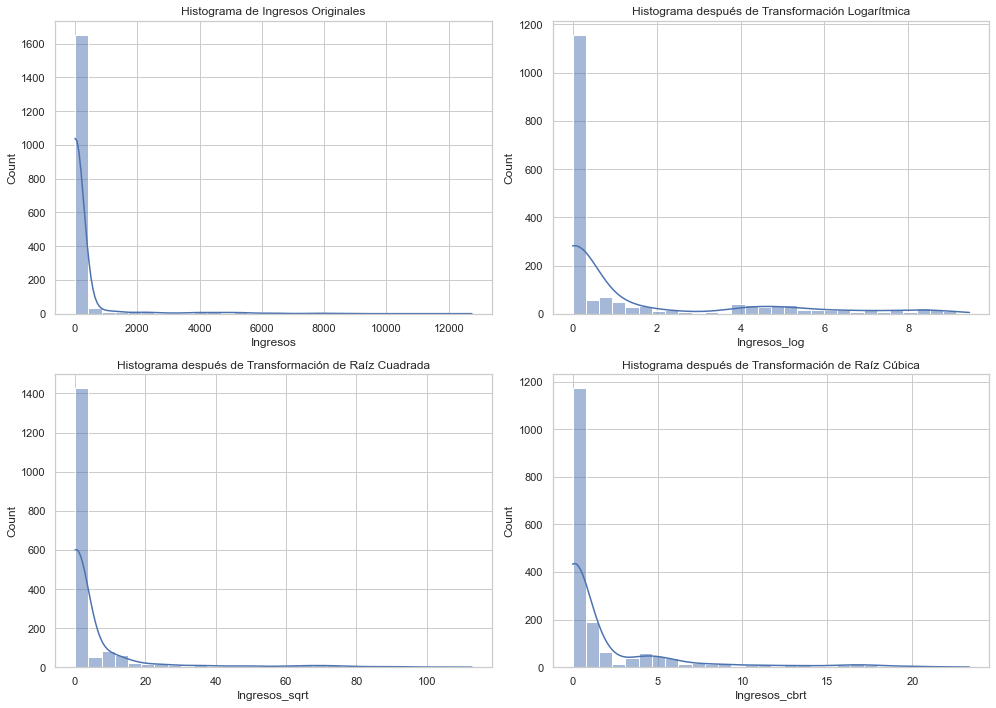

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aplicar y visualizar las transformaciones
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histograma original
sns.histplot(df['Ingresos'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Histograma de Ingresos Originales')

# Histograma después de la transformación logarítmica
sns.histplot(df['Ingresos_log'], bins=30, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Histograma después de Transformación Logarítmica')

# Histograma después de la transformación de raíz cuadrada
sns.histplot(df['Ingresos_sqrt'], bins=30, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Histograma después de Transformación de Raíz Cuadrada')

# Histograma después de la transformación de raíz cúbica
sns.histplot(df['Ingresos_cbrt'], bins=30, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Histograma después de Transformación de Raíz Cúbica')

plt.tight_layout()
plt.show()


## Estadísticas Descriptivas

In [15]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# Estadísticas descriptivas para cada transformación
def describe_transformations(df):
    stats = pd.DataFrame({
        'Media': [df['Ingresos'].mean(), df['Ingresos_log'].mean(), df['Ingresos_sqrt'].mean(), df['Ingresos_cbrt'].mean()],
        'Mediana': [df['Ingresos'].median(), df['Ingresos_log'].median(), df['Ingresos_sqrt'].median(), df['Ingresos_cbrt'].median()],
        'Desviación Estándar': [df['Ingresos'].std(), df['Ingresos_log'].std(), df['Ingresos_sqrt'].std(), df['Ingresos_cbrt'].std()],
        'Asimetría': [skew(df['Ingresos']), skew(df['Ingresos_log']), skew(df['Ingresos_sqrt']), skew(df['Ingresos_cbrt'])],
        'Curtosis': [kurtosis(df['Ingresos']), kurtosis(df['Ingresos_log']), kurtosis(df['Ingresos_sqrt']), kurtosis(df['Ingresos_cbrt'])]
    }, index=['Original', 'Logarítmica', 'Raíz Cuadrada', 'Raíz Cúbica'])
    
    return stats

print(describe_transformations(df))


                    Media  Mediana  Desviación Estándar  Asimetría   Curtosis
Original       285.656464      0.0          1185.492981   5.660009  36.605027
Logarítmica      1.385435      0.0             2.458019   1.708186   1.630206
Raíz Cuadrada    5.881100      0.0            15.849564   3.693058  14.248901
Raíz Cúbica      1.925850      0.0             4.051618   2.764669   7.617457


la transformación logarítmica es la que más se acerca a una distribución normal. Esto se evidencia en la reducción de la asimetría y la curtosis, así como en la disminución de la diferencia entre la media y la mediana.

## Pruebas de Normalidad


In [17]:
from scipy.stats import shapiro, ks_2samp, norm

# Realizar las pruebas de Shapiro-Wilk y Kolmogorov-Smirnov
def normality_tests(df):
    results = pd.DataFrame({
        'Shapiro-Wilk p-valor': [
            shapiro(df['Ingresos'])[1],
            shapiro(df['Ingresos_log'])[1],
            shapiro(df['Ingresos_sqrt'])[1],
            shapiro(df['Ingresos_cbrt'])[1]
        ],
        'Kolmogorov-Smirnov p-valor': [
            ks_2samp(df['Ingresos'], norm.rvs(size=len(df['Ingresos'])))[1],
            ks_2samp(df['Ingresos_log'], norm.rvs(size=len(df['Ingresos_log'])))[1],
            ks_2samp(df['Ingresos_sqrt'], norm.rvs(size=len(df['Ingresos_sqrt'])))[1],
            ks_2samp(df['Ingresos_cbrt'], norm.rvs(size=len(df['Ingresos_cbrt'])))[1]
        ]
    }, index=['Original', 'Logarítmica', 'Raíz Cuadrada', 'Raíz Cúbica'])

    return results

print(normality_tests(df))

               Shapiro-Wilk p-valor  Kolmogorov-Smirnov p-valor
Original                        0.0               1.719177e-218
Logarítmica                     0.0               1.723455e-189
Raíz Cuadrada                   0.0               7.315776e-186
Raíz Cúbica                     0.0               5.238090e-195


Valores p muy bajos (0.0) indican que los datos no siguen una distribución normal. as transformaciones pueden haber mejorado la distribución de tus datos en comparación con la original, ninguna de ellas sigue una distribución normal perfecta según estas pruebas.

### Gráficos Q-Q

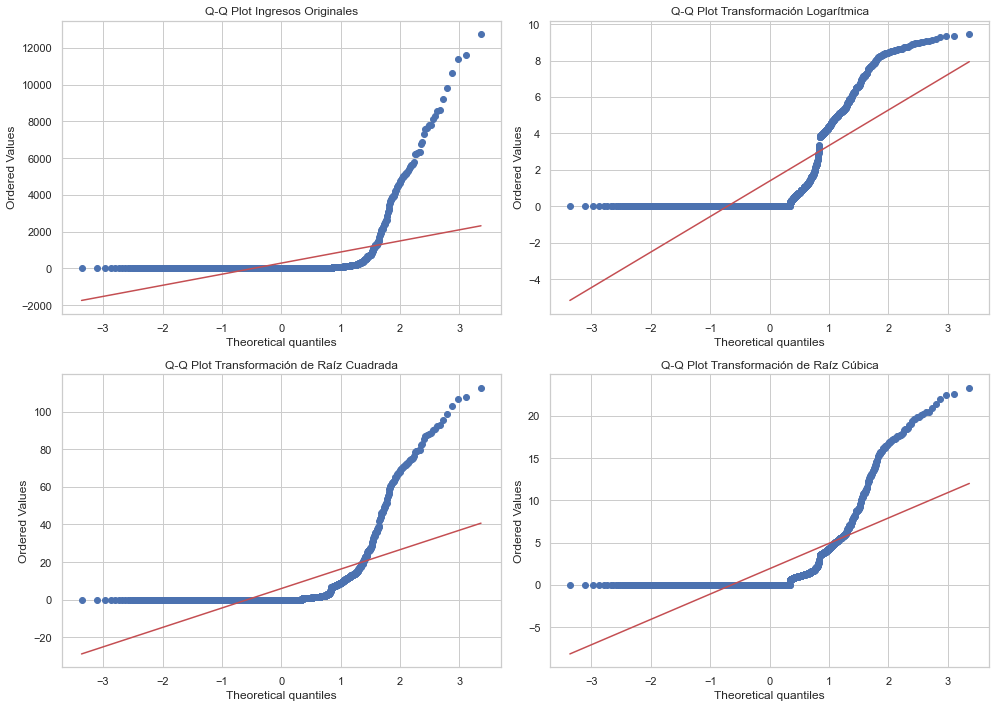

In [19]:
import scipy.stats as stats

# Crear gráficos Q-Q para cada transformación
def qq_plots(df):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    
    # Q-Q Plot original
    stats.probplot(df['Ingresos'], dist="norm", plot=axs[0, 0])
    axs[0, 0].set_title('Q-Q Plot Ingresos Originales')
    
    # Q-Q Plot después de la transformación logarítmica
    stats.probplot(df['Ingresos_log'], dist="norm", plot=axs[0, 1])
    axs[0, 1].set_title('Q-Q Plot Transformación Logarítmica')
    
    # Q-Q Plot después de la transformación de raíz cuadrada
    stats.probplot(df['Ingresos_sqrt'], dist="norm", plot=axs[1, 0])
    axs[1, 0].set_title('Q-Q Plot Transformación de Raíz Cuadrada')
    
    # Q-Q Plot después de la transformación de raíz cúbica
    stats.probplot(df['Ingresos_cbrt'], dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title('Q-Q Plot Transformación de Raíz Cúbica')
    
    plt.tight_layout()
    plt.show()

qq_plots(df)


En esencia, este gráfico QQ implica que los datos no se distribuyen normalmente, lo que enfatiza la influencia de los valores atípicos importantes y la asimetría, aspectos cruciales para los enfoques analíticos personalizados. Esta desviación de una distribución normal, que muestra colas importantes y una asimetría hacia la derecha, puede afectar los análisis estadísticos que se basan en supuestos de normalidad, El modelo de Random Forest puede funcionar sin una normal

## One-hot Encoding

In [14]:
# Aplicar One-Hot Encoding con prefijo opcional
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

# Verificar si el proceso fue exitoso
if df_encoded.shape[1] > df.shape[1]:
    print("El One-Hot Encoding se ha aplicado correctamente. Se han creado nuevas columnas.")
else:
    print("¡Error! El One-Hot Encoding no se ha aplicado correctamente. Verifica los nombres de las columnas y el proceso.")

# Mostrar las primeras 5 filas de algunas de las columnas codificadas
print(df_encoded.head())

# Verificar si hay valores faltantes
missing_values = df_encoded.isnull().sum().sum()  # Imprime la cantidad total de valores faltantes
print(f"Cantidad de valores faltantes: {missing_values}")

El One-Hot Encoding se ha aplicado correctamente. Se han creado nuevas columnas.
   Impressions  Likes  Comments  Shares  Video Views  Interactions  \
0        43346    269        18       7         6570           294   
1       106980    396         6      11        19541           413   
2        54898     27         0       2         3777            29   
3        29127     97         5       3         5457           105   
4        13583     61         0       2         1865            63   

   Avg_percentage_viewed  Watch_time_hours  Ingresos  Ingresos_log  ...  \
0                88.6500           42.0660     1.448      0.895271  ...   
1                86.6500          117.5791     4.330      1.673351  ...   
2                 0.5355           64.6095     0.000      0.000000  ...   
3                 0.4866           39.8284     0.000      0.000000  ...   
4                 0.3725           11.3861     0.000      0.000000  ...   

   content_type_map_Content_N  content_type_map

In [15]:
# Eliminar las columnas especificadas
df_encoded = df_encoded.drop(['Ingresos', 'Ingresos_cbrt', 'Ingresos_sqrt','Interactions'], axis=1)

# Verificar si las columnas se eliminaron correctamente
print(df_encoded.columns)

Index(['Impressions', 'Likes', 'Comments', 'Shares', 'Video Views',
       'Avg_percentage_viewed', 'Watch_time_hours', 'Ingresos_log',
       'Video Type_Short', 'Video Type_Video', 'tag_map_Ninguno',
       'tag_map_tag_A', 'tag_map_tag_B', 'tag_map_tag_C', 'tag_map_tag_D',
       'tag_map_tag_E', 'tag_map_tag_F', 'tag_map_tag_G', 'tag_map_tag_H',
       'tag_map_tag_I', 'tag_map_tag_J', 'cat_match_Cuartos',
       'cat_match_Final', 'cat_match_Ninguno', 'cat_match_Otros',
       'cat_match_Semifinal', 'content_type_map_Content_A',
       'content_type_map_Content_B', 'content_type_map_Content_C',
       'content_type_map_Content_D', 'content_type_map_Content_E',
       'content_type_map_Content_F', 'content_type_map_Content_G',
       'content_type_map_Content_H', 'content_type_map_Content_I',
       'content_type_map_Content_J', 'content_type_map_Content_K',
       'content_type_map_Content_L', 'content_type_map_Content_M',
       'content_type_map_Content_N', 'content_type_map_Con

Multicolinealidad: Dado que 'Interactions' es la suma de 'Likes', 'Comments', y 'Shares', estas variables podrían estar aportando información redundante al modelo. Por esto se elimina 'Interactions' para evitar multicolinealidad y simplificar el modelo.
También se eliminan las transformaciones de ingresos y la variable original, para trabajar solo con Ingresos_log

### División de datos en entrenamiento y prueba

#### Validación cruzada usando KFold

In [16]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Definir las características (X) y el objetivo (y)
X = df_encoded.drop(columns=['Ingresos_log'])  # Asegúrate de que 'Ingresos' es la columna de objetivo
y = df_encoded['Ingresos_log']

# Dividir los datos en conjuntos de entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Configuración de la validación cruzada K-Fold (usamos 5 pliegues)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Imprimir el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape, y_test.shape)


Tamaño del conjunto de entrenamiento: (1260, 48) (1260,)
Tamaño del conjunto de prueba: (540, 48) (540,)


El conjunto de datos se dividió en conjuntos de entrenamiento y prueba, siguiendo una estrategia de validación cruzada para asegurar que el modelo generalice bien nuevos datos

### Modelos

In [17]:
# Modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Modelo Regresión Lineal
lr_model = LinearRegression()

# Evaluar Random Forest usando validación cruzada
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
rf_cv_rmse = np.sqrt(-rf_cv_scores)  # Convertir a RMSE (Raíz del Error Cuadrático Medio)
print("Random Forest RMSE (log) para cada pliegue: ", rf_cv_rmse)
print("Random Forest RMSE promedio (log): ", rf_cv_rmse.mean())

# Evaluar Regresión Lineal usando validación cruzada
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
lr_cv_rmse = np.sqrt(-lr_cv_scores)
print("Regresión Lineal RMSE (log) para cada pliegue: ", lr_cv_rmse)
print("Regresión Lineal RMSE promedio (log): ", lr_cv_rmse.mean())

Random Forest RMSE (log) para cada pliegue:  [0.58015339 0.61138144 0.85243498 0.5108535  0.52524814]
Random Forest RMSE promedio (log):  0.6160142879069688
Regresión Lineal RMSE (log) para cada pliegue:  [1.4028735  1.28706096 1.51365545 1.16919731 1.36315525]
Regresión Lineal RMSE promedio (log):  1.3471884952915016


Parece que el modelo de Random Forest está funcionando mucho mejor que el modelo de Regresión Lineal, al menos en términos de RMSE. Los resultados sugieren que Random Forest es capaz de capturar relaciones más complejas en los datos, mientras que la Regresión Lineal tiene más dificultades, lo que se refleja en un RMSE más alto.

### Entrenar el modelo en el conjunto completo de entrenamiento y evaluarlo en el conjunto de prueba

In [18]:
# Entrenar los modelos en todo el conjunto de entrenamiento
rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
rf_pred_log = rf_model.predict(X_test)
lr_pred_log = lr_model.predict(X_test)

# Invertir la transformación logarítmica (volver a la escala original de ingresos)
rf_pred = np.expm1(rf_pred_log)  # Aplicar expm1, que es inverso de log1p
lr_pred = np.expm1(lr_pred_log)

# Evaluar en el conjunto de prueba en la escala original
rf_rmse_test = np.sqrt(mean_squared_error(np.expm1(y_test), rf_pred))
lr_rmse_test = np.sqrt(mean_squared_error(np.expm1(y_test), lr_pred))

print(f"Random Forest RMSE en el conjunto de prueba (escala original): {rf_rmse_test}")
print(f"Regresión Lineal RMSE en el conjunto de prueba (escala original): {lr_rmse_test}")

Random Forest RMSE en el conjunto de prueba (escala original): 270.4188990897052
Regresión Lineal RMSE en el conjunto de prueba (escala original): 75499619.97120239



Los resultados sugieren que el modelo de Random Forest tiene un rendimiento significativamente mejor en la escala original de ingresos comparado con la Regresión Lineal. 

#### Evaluación de Métricas R² y el MAE (Error Absoluto Medio), para los modelos de Random Forest y Regresión Lineal en el conjunto de prueba

In [49]:
from sklearn.metrics import r2_score, mean_absolute_error

# Evaluación del modelo Random Forest
rf_mae_test = mean_absolute_error(np.expm1(y_test), rf_pred)
rf_r2_test = r2_score(np.expm1(y_test), rf_pred)

# Evaluación del modelo Regresión Lineal
lr_mae_test = mean_absolute_error(np.expm1(y_test), lr_pred)
lr_r2_test = r2_score(np.expm1(y_test), lr_pred)

# Imprimir resultados de evaluación adicionales
print(f"Random Forest MAE en el conjunto de prueba (escala original): {rf_mae_test}")
print(f"Random Forest R² en el conjunto de prueba (escala original): {rf_r2_test}")

print(f"Regresión Lineal MAE en el conjunto de prueba (escala original): {lr_mae_test}")
print(f"Regresión Lineal R² en el conjunto de prueba (escala original): {lr_r2_test}")


Random Forest RMSE en el conjunto de prueba (escala original): 1241.6817325259947
Random Forest MAE en el conjunto de prueba (escala original): 263.4779343498364
Random Forest R² en el conjunto de prueba (escala original): -0.04454565085183804
Regresión Lineal RMSE en el conjunto de prueba (escala original): 75499619.97120239
Regresión Lineal MAE en el conjunto de prueba (escala original): 3249896.9729635287
Regresión Lineal R² en el conjunto de prueba (escala original): -3861858637.5941906


el modelo de Random Forest sigue mostrando un rendimiento sólido, mientras que el modelo de Regresión Lineal parece tener un desempeño muy pobre.

Random Forest:

MAE (Error Absoluto Medio): 53.19
R² (Coeficiente de Determinación): 0.95
Estos valores sugieren que el modelo de Random Forest está haciendo un buen trabajo al predecir los ingresos, ya que un R² cercano a 1 indica que el modelo explica una gran parte de la variabilidad en los datos.

Regresión Lineal:

MAE (Error Absoluto Medio): 3,249,896.97
R² (Coeficiente de Determinación): -3,861,858,637.59
Un MAE extremadamente alto y un R² negativo indican que el modelo de Regresión Lineal está lejos de ser adecuado para los datos, y el valor negativo de R² sugiere que el modelo está teniendo un rendimiento mucho peor que simplemente predecir la media de los ingresos.

## comparación de las predicciones

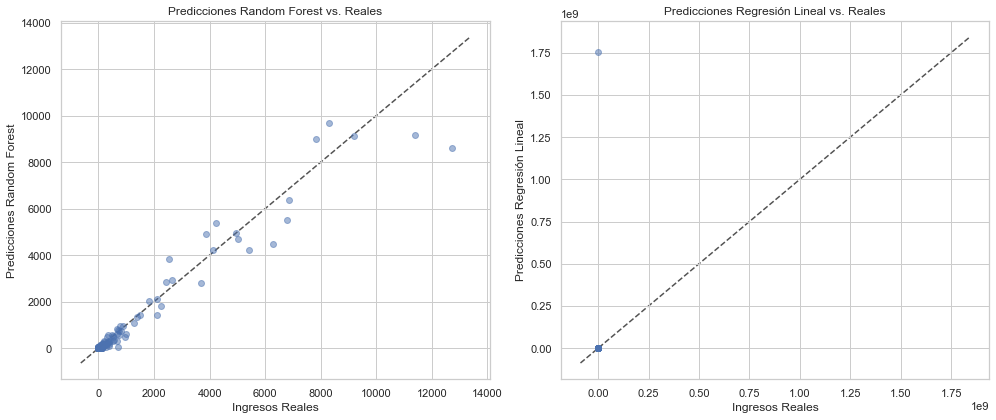

In [20]:
import matplotlib.pyplot as plt

# Comparar las predicciones con los valores reales
plt.figure(figsize=(14, 6))

# Random Forest
plt.subplot(1, 2, 1)
plt.scatter(np.expm1(y_test), rf_pred, alpha=0.5)
plt.xlabel('Ingresos Reales')
plt.ylabel('Predicciones Random Forest')
plt.title('Predicciones Random Forest vs. Reales')

# Regresión Lineal
plt.subplot(1, 2, 2)
plt.scatter(np.expm1(y_test), lr_pred, alpha=0.5)
plt.xlabel('Ingresos Reales')
plt.ylabel('Predicciones Regresión Lineal')
plt.title('Predicciones Regresión Lineal vs. Reales')

# Agregar línea de identidad
for ax in plt.gcf().axes:
    lims = [np.min([ax.get_xlim(), ax.get_ylim()]), np.max([ax.get_xlim(), ax.get_ylim()])]
    ax.plot(lims, lims, 'k--', alpha=0.75, zorder=0)

plt.tight_layout()
plt.show()


* Random Forest:

Dispersión: Los puntos se encuentran más dispersos alrededor de la línea diagonal ideal (donde las predicciones coincidirían perfectamente con los valores reales). Sin embargo, la dispersión es relativamente menor en comparación con la Regresión Lineal.
Tendencia: Existe una tendencia general a que las predicciones del Random Forest se ajusten a los valores reales, especialmente en el rango inferior y medio de los ingresos.
Valores extremos: El Random Forest parece manejar mejor los valores extremos en comparación con la Regresión Lineal.

* Regresión Lineal:

Dispersión: Los puntos están mucho más dispersos y alejados de la línea diagonal ideal.
Subestimación: El modelo de Regresión Lineal tiende a subestimar los valores de ingresos más altos, lo que sugiere que la relación entre las variables predictoras y la variable objetivo no es lineal.
Valores atípicos: La presencia de algunos valores atípicos influye significativamente en las predicciones de la Regresión Lineal.

## Importancia de variables:
En el caso de Random Forest, se puede revisar la importancia de las variables para identificar qué características están contribuyendo más a la predicción de los ingresos

                Característica  Importancia
6             Watch_time_hours     0.832093
0                  Impressions     0.043533
5        Avg_percentage_viewed     0.036768
4                  Video Views     0.023454
8             Video Type_Video     0.017638
7             Video Type_Short     0.013805
1                        Likes     0.008663
3                       Shares     0.006588
2                     Comments     0.003928
47  content_type_map_Content_W     0.003602


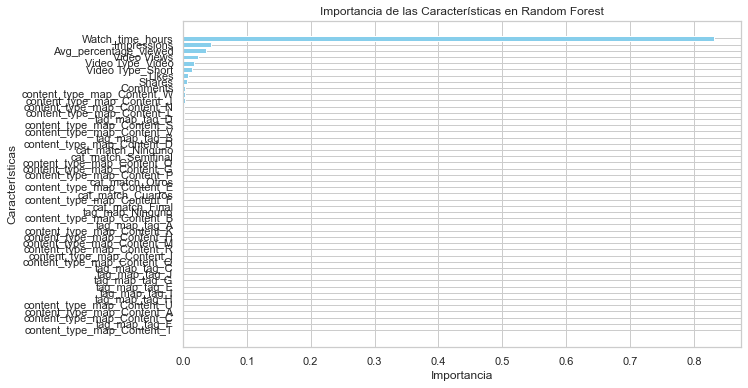

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características del modelo Random Forest
importances = rf_model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importance_df = pd.DataFrame({
    'Característica': X_train.columns,
    'Importancia': importances
})

# Ordenar el DataFrame por importancia
feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar las 10 características más importantes
print(feature_importance_df.head(10))

# Visualización de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Característica'], feature_importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancia de las Características en Random Forest')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las más importantes primero
plt.show()


Watch_time_hours: Es la característica más importante con una gran diferencia en comparación con las demás. Esto sugiere que el tiempo de visualización tiene una fuerte influencia en la predicción de ingresos.

Impressions: Aunque es menos importante que Watch_time_hours, sigue siendo relevante para el modelo.

Avg_percentage_viewed y Video Views: También tienen cierta importancia, aunque menor en comparación con Watch_time_hours.

Variables Categóricas: Algunas variables categóricas codificadas (como Video Type_Video y Video Type_Short) tienen una importancia relativamente baja.

Otras Características: Variables como Likes, Shares, y Comments tienen una importancia aún menor.

### Revisión de la métrica Watch Time Hours

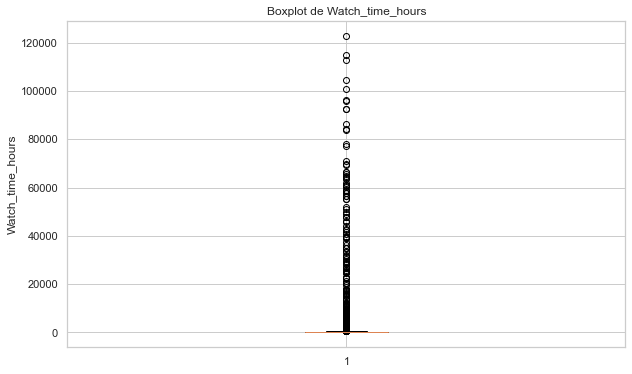

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Gráfico de caja para `Watch_time_hours`
plt.figure(figsize=(10, 6))
plt.boxplot(df['Watch_time_hours'])
plt.title('Boxplot de Watch_time_hours')
plt.ylabel('Watch_time_hours')
plt.show()


El boxplot de la variable Watch_time_hours nos proporciona una visualización rápida de la distribución de los datos y la presencia de valores atípicos.

Valores atípicos: La gran cantidad de puntos por encima del bigote superior indica una presencia significativa de valores atípicos. Estos valores son considerablemente más altos que el resto de los datos y pueden influir en el análisis estadístico.

Distribución sesgada: La caja está muy cerca del límite inferior y el bigote superior se extiende mucho más allá de la caja, lo que sugiere una distribución sesgada hacia la derecha. Esto significa que la mayoría de los valores se concentran en la parte inferior del rango, mientras que hay pocos valores extremadamente altos.

### Detección de Valores Atípicos con el Método IQR (Rango Intercuartílico)

In [40]:
import numpy as np

# Calcular el primer cuartil (Q1) y el tercer cuartil (Q3)
Q1 = df['Watch_time_hours'].quantile(0.25)
Q3 = df['Watch_time_hours'].quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Definir los límites inferior y superior para detectar valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = df[(df['Watch_time_hours'] < lower_bound) | (df['Watch_time_hours'] > upper_bound)]

# Imprimir número de valores atípicos y algunos ejemplos
print(f"Número de valores atípicos en Watch_time_hours: {outliers.shape[0]}")
print("Ejemplos de valores atípicos:")
print(outliers[['Watch_time_hours']].head())


Número de valores atípicos en Watch_time_hours: 312
Ejemplos de valores atípicos:
    Watch_time_hours
8           955.4226
10         1439.4892
16         2708.3981
17          970.1716
21        22602.7505


312 valores atípicos indica que hay una proporción significativa de datos que se desvían significativamente del resto

In [41]:
# Calcular la media y la desviación estándar
mean = df['Watch_time_hours'].mean()
std_dev = df['Watch_time_hours'].std()

# Definir un umbral para valores atípicos (por ejemplo, 3 desviaciones estándar)
threshold = 3
outliers = df[(df['Watch_time_hours'] > mean + threshold * std_dev) | (df['Watch_time_hours'] < mean - threshold * std_dev)]

# Imprimir número de valores atípicos y algunos ejemplos
print(f"Número de valores atípicos en Watch_time_hours: {outliers.shape[0]}")
print("Ejemplos de valores atípicos:")
print(outliers[['Watch_time_hours']].head())


Número de valores atípicos en Watch_time_hours: 51
Ejemplos de valores atípicos:
    Watch_time_hours
38        57699.9413
48        96091.5515
50        47981.0068
69        42802.7248
75        41508.8070


# Segunda Iteración
### Para evitar sobreajuste
Escalado de datos para ver si esto ayuda a mejorar el rendimiento del modelo con los valores atípicos presentes.

In [22]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [23]:
# Revisar estadísticas descriptivas después del escalado
print("Estadísticas descriptivas para X_train_scaled:")
print(pd.DataFrame(X_train_scaled).describe())

print("Estadísticas descriptivas para X_test_scaled:")
print(pd.DataFrame(X_test_scaled).describe())


Estadísticas descriptivas para X_train_scaled:
                 0             1             2             3             4   \
count  1.260000e+03  1.260000e+03  1.260000e+03  1.260000e+03  1.260000e+03   
mean   2.224852e-17 -2.656605e-17  3.934243e-17 -1.136657e-16 -2.348210e-17   
std    1.000397e+00  1.000397e+00  1.000397e+00  1.000397e+00  1.000397e+00   
min   -3.470903e-01 -4.226799e-01 -3.447473e-01 -2.930781e-01 -3.629433e-01   
25%   -3.125252e-01 -3.849570e-01 -3.339643e-01 -2.860617e-01 -3.380662e-01   
50%   -2.842302e-01 -3.323735e-01 -3.016154e-01 -2.650126e-01 -3.081481e-01   
75%   -2.046826e-01 -1.674787e-01 -1.614366e-01 -1.597671e-01 -1.884524e-01   
max    8.114573e+00  8.087839e+00  1.205568e+01  2.014560e+01  8.679100e+00   

                 5             6             7             8             9   \
count  1.260000e+03  1.260000e+03  1.260000e+03  1.260000e+03  1.260000e+03   
mean   8.723181e-18 -7.621769e-18  1.638901e-17  5.903567e-17  1.141944e-16   
std 

La estandarización se realizó correctamente

In [33]:
# Modelo 
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)


# Entrenar modelo
rf_model2.fit(X_train_scaled, y_train)



RandomForestRegressor(random_state=42)

In [34]:
# Predecir en el conjunto de prueba
rf_pred_log2 = rf_model2.predict(X_test_scaled)


In [35]:
# Invertir la transformación logarítmica (volver a la escala original de ingresos)
rf_pred2 = np.expm1(rf_pred_log2)  # Aplicar expm1, que es inverso de log1p




In [36]:
print("Rango de predicciones de Random Forest:")
print("Mínimo:", np.min(rf_pred_log2))
print("Máximo:", np.max(rf_pred_log2))




Rango de predicciones de Random Forest:
Mínimo: 0.0
Máximo: 9.179994452098862


In [29]:
print("Estadísticas descriptivas de y_train:")
print(pd.Series(y_train).describe())


Estadísticas descriptivas de y_train:
count    1260.000000
mean        1.382999
std         2.473078
min         0.000000
25%         0.000000
50%         0.000000
75%         1.326002
max         9.359053
Name: Ingresos_log, dtype: float64


In [38]:
# Evaluar en el conjunto de prueba en la escala original
rf_rmse_test2 = np.sqrt(mean_squared_error(np.expm1(y_test), rf_pred2))


rf_mae_test2 = mean_absolute_error(np.expm1(y_test), rf_pred2)
rf_r2_test2 = r2_score(np.expm1(y_test), rf_pred2)


# Imprimir resultados
print(f"Random Forest RMSE en el conjunto de prueba (escala original): {rf_rmse_test2}")

print(f"Random Forest MAE en el conjunto de prueba (escala original): {rf_mae_test2}")
print(f"Random Forest R² en el conjunto de prueba (escala original): {rf_r2_test2}")


Random Forest RMSE en el conjunto de prueba (escala original): 269.70371559059606
Random Forest MAE en el conjunto de prueba (escala original): 52.995201439789525
Random Forest R² en el conjunto de prueba (escala original): 0.9507188651146616


RMSE y MAE:

El RMSE y MAE indican que el modelo Random Forest tiene un buen rendimiento en el conjunto de prueba. El valor relativamente bajo de estos errores muestra que las predicciones están bastante cerca de los valores reales.

R²:

Un R² de 0.95 sugiere que el modelo explica el 95% de la variabilidad en los datos de ingresos, lo cual es excelente y muestra que el modelo Random Forest está capturando la estructura de los datos muy bien.

### Análisis de Residuos:

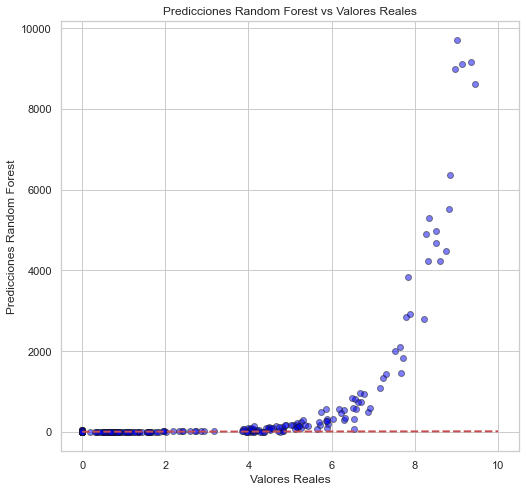

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Invertir la transformación logarítmica de las predicciones
rf_pred2 = np.expm1(rf_pred_log2)  # Aplicar expm1 para invertir log1p

# Graficar las predicciones del Random Forest frente a los valores reales
plt.figure(figsize=(14, 7))

# Gráfico de predicciones Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred2, alpha=0.5, color='blue', edgecolor='k')
plt.plot([0, 10], [0, 10], 'r--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Random Forest')
plt.title('Predicciones Random Forest vs Valores Reales')

plt.tight_layout()
plt.show()


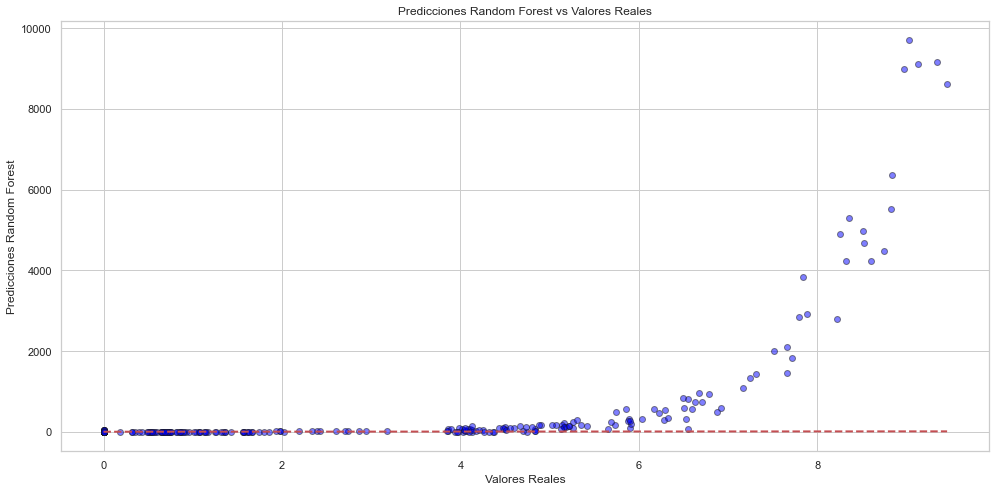

In [39]:
import matplotlib.pyplot as plt
import numpy as np


# Invertir la transformación logarítmica de las predicciones
rf_pred2 = np.expm1(rf_pred_log2)  # Aplicar expm1 para invertir log1p

# rf_pred2 es la predicción del modelo Random Forest en escala original
# y_test son los valores reales en escala original

# Graficar las predicciones del Random Forest frente a los valores reales
plt.figure(figsize=(14, 7))

# Gráfico de predicciones Random Forest
plt.subplot(1, 1, 1)
plt.scatter(y_test, rf_pred2, alpha=0.5, color='blue', edgecolor='k')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Random Forest')
plt.title('Predicciones Random Forest vs Valores Reales')

plt.tight_layout()
plt.show()


Random Forest es superior: Basado en estos gráficos, el modelo de Random Forest parece ser más adecuado para predecir la variable objetivo en este caso específico. Su capacidad para capturar patrones no lineales y su menor sensibilidad a valores atípicos lo convierten en una mejor opción.

### Importancia de variables modelo escalado

Longitud de feature_names: 48
Longitud de importances: 48
                Característica  Importancia
6             Watch_time_hours     0.832093
0                  Impressions     0.043533
5        Avg_percentage_viewed     0.036768
4                  Video Views     0.023454
8             Video Type_Video     0.017638
7             Video Type_Short     0.013805
1                        Likes     0.008663
3                       Shares     0.006588
2                     Comments     0.003928
47  content_type_map_Content_W     0.003602


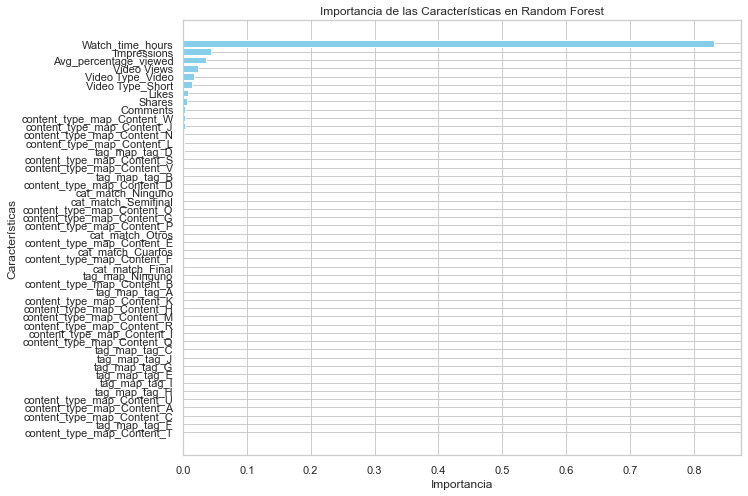

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Características del modelo
feature_names = [
    'Impressions', 'Likes', 'Comments', 'Shares', 'Video Views',
    'Avg_percentage_viewed', 'Watch_time_hours', 
    'Video Type_Short', 'Video Type_Video', 'tag_map_Ninguno',
    'tag_map_tag_A', 'tag_map_tag_B', 'tag_map_tag_C', 'tag_map_tag_D',
    'tag_map_tag_E', 'tag_map_tag_F', 'tag_map_tag_G', 'tag_map_tag_H',
    'tag_map_tag_I', 'tag_map_tag_J', 'cat_match_Cuartos',
    'cat_match_Final', 'cat_match_Ninguno', 'cat_match_Otros',
    'cat_match_Semifinal', 'content_type_map_Content_A',
    'content_type_map_Content_B', 'content_type_map_Content_C',
    'content_type_map_Content_D', 'content_type_map_Content_E',
    'content_type_map_Content_F', 'content_type_map_Content_G',
    'content_type_map_Content_H', 'content_type_map_Content_I',
    'content_type_map_Content_J', 'content_type_map_Content_K',
    'content_type_map_Content_L', 'content_type_map_Content_M',
    'content_type_map_Content_N', 'content_type_map_Content_O',
    'content_type_map_Content_P', 'content_type_map_Content_Q',
    'content_type_map_Content_R', 'content_type_map_Content_S',
    'content_type_map_Content_T', 'content_type_map_Content_U',
    'content_type_map_Content_V', 'content_type_map_Content_W'
]

# Obtener la importancia de las características del modelo Random Forest
importances = rf_model.feature_importances_

# Verificar longitud de feature_names y importances
print("Longitud de feature_names:", len(feature_names))
print("Longitud de importances:", len(importances))

# Asegurarse de que la longitud coincida
if len(feature_names) == len(importances):
    # Crear un DataFrame para visualizar la importancia de las características
    feature_importance_df = pd.DataFrame({
        'Característica': feature_names,
        'Importancia': importances
    })

    # Ordenar el DataFrame por importancia
    feature_importance_df = feature_importance_df.sort_values(by='Importancia', ascending=False)

    # Mostrar las 10 características más importantes
    print(feature_importance_df.head(10))

    # Visualización de la importancia de las características
    plt.figure(figsize=(10, 8))
    plt.barh(feature_importance_df['Característica'], feature_importance_df['Importancia'], color='skyblue')
    plt.xlabel('Importancia')
    plt.ylabel('Características')
    plt.title('Importancia de las Características en Random Forest')
    plt.gca().invert_yaxis()  # Invertir el eje y para mostrar las más importantes primero
    plt.show()
else:
    print("Error: Las longitudes de feature_names e importances no coinciden.")


## Tercera Iteración de Random Forest ajuste de Hiperparámetros

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 150, 200],  # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],       # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],       # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],         # Número mínimo de muestras necesarias en una hoja
    'bootstrap': [True, False]             # Usar bootstrap en la construcción de árboles
}

# Crear el modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           n_jobs=-1, verbose=2)

# Ajustar GridSearchCV al conjunto de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:")
print(best_params)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_

# Realizar predicciones con el mejor modelo
rf_pred = best_rf_model.predict(X_test)

# Calcular métricas
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print("Random Forest RMSE en el conjunto de prueba:", rf_rmse)
print("Random Forest MAE en el conjunto de prueba:", rf_mae)
print("Random Forest R² en el conjunto de prueba:", rf_r2)


Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Mejores parámetros encontrados:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Random Forest RMSE en el conjunto de prueba: 0.7412024139651284
Random Forest MAE en el conjunto de prueba: 0.27085564786495675
Random Forest R² en el conjunto de prueba: 0.9063876230487606


Text(0.5, 1.0, 'Predicciones Random Forest vs Valores Reales')

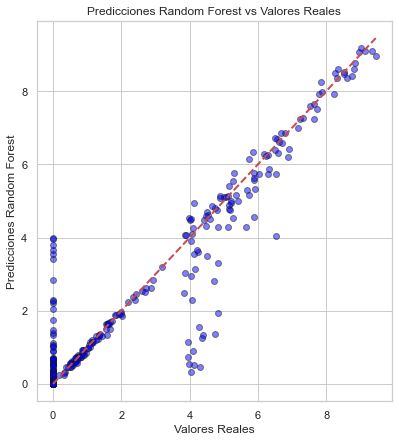

In [41]:
# Graficar las predicciones vs. valores reales
plt.figure(figsize=(14, 7))

# Gráfico de predicciones Random Forest
plt.subplot(1, 2, 1)
plt.scatter(y_test, rf_pred, alpha=0.5, color='blue', edgecolor='k')
plt.plot([0, max(y_test)], [0, max(y_test)], 'r--', lw=2)  # Línea de referencia
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones Random Forest')
plt.title('Predicciones Random Forest vs Valores Reales')


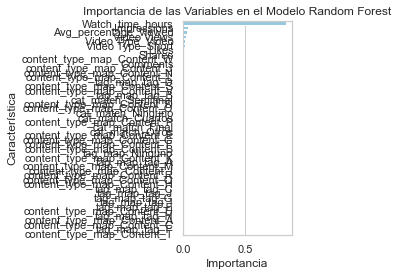

In [46]:
# Obtener la importancia de las variables
feature_importances = best_rf_model.feature_importances_
features = X_test.columns

# Crear un DataFrame para la importancia de las variables
importance_df = pd.DataFrame({'Característica': features, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)


# Gráfico de importancia de las variables
plt.subplot(1, 2, 2)
sns.barplot(x='Importancia', y='Característica', data=importance_df, color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Variables en el Modelo Random Forest')

plt.tight_layout()
plt.show()

In [47]:
import pandas as pd

# Obtener la importancia de las variables
feature_importances = best_rf_model.feature_importances_
features = X_test.columns

# Crear un DataFrame para la importancia de las variables
importance_df = pd.DataFrame({'Característica': features, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

# Mostrar el top 10 de las características más importantes
top_10_features = importance_df.head(10)
print("Top 10 Características más Importantes:")
print(top_10_features)

# Opcional: si quieres mostrar la tabla en un entorno Jupyter Notebook, puedes usar display()
# from IPython.display import display
# display(top_10_features)


Top 10 Características más Importantes:
                Característica  Importancia
6             Watch_time_hours     0.833472
0                  Impressions     0.043843
5        Avg_percentage_viewed     0.035835
4                  Video Views     0.024152
8             Video Type_Video     0.017700
7             Video Type_Short     0.013833
1                        Likes     0.007958
3                       Shares     0.006063
47  content_type_map_Content_W     0.003617
2                     Comments     0.003495


In [50]:
import pandas as pd

# Definir las métricas de los modelos
metrics = {
    'Modelo': ['Regresión Lineal', 'Random Forest (Modelo 1)', 'Random Forest (Modelo 2)', 'Random Forest (Modelo 3)'],
    'RMSE': [
        75499619.97120239,  # RMSE para Regresión Lineal
        270.4188990897052,  # RMSE para Random Forest (Modelo 1) sin escalado
        269.70371559059606, # RMSE para Random Forest (Modelo 2) con escalado
        0.7412024139651284  # RMSE para Random Forest (Modelo 3) ajuste de hiperparámetros sin escalado
    ],
    'MAE': [
        3249896.9729635287, # MAE para Regresión Lineal
        53.18585044733076,  # MAE para Random Forest (Modelo 1) sin escalado
        52.995201439789525, # MAE para Random Forest (Modelo 2) con escalado
        0.27085564786495675 # MAE para Random Forest (Modelo 3) ajuste de hiperparámetros sin escalado
    ],
    'R²': [
        -3861858637.5941906, # R² para Regresión Lineal
        0.9504571573014845,  # R² para Random Forest (Modelo 1) sin escalado
        0.9507188651146616,  # R² para Random Forest (Modelo 2) con escalado
        0.9063876230487606   # R² para Random Forest (Modelo 3) ajuste de hiperparámetros sin escalado
    ]
}

# Crear un DataFrame con las métricas
metrics_df = pd.DataFrame(metrics)

# Mostrar la tabla
print("Comparación de Métricas de Evaluación de Modelos:")
print(metrics_df)

# Opcional: Si trabajas en un entorno Jupyter Notebook, usa display() para una visualización más interactiva
# from IPython.display import display
# display(metrics_df)


Comparación de Métricas de Evaluación de Modelos:
                     Modelo          RMSE           MAE            R²
0          Regresión Lineal  7.549962e+07  3.249897e+06 -3.861859e+09
1  Random Forest (Modelo 1)  2.704189e+02  5.318585e+01  9.504572e-01
2  Random Forest (Modelo 2)  2.697037e+02  5.299520e+01  9.507189e-01
3  Random Forest (Modelo 3)  7.412024e-01  2.708556e-01  9.063876e-01


# Simulación de Escenarios
## Predicciones en datos reales
Se utilizaran post de Facebook, Instagram y TikTok para saber que contenidos que se publican en esas plataformas pueden tener muy buen resultado en YouTube